In [9]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
stock='BUD'
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2020, 10, 7)

prices = web.DataReader(stock, 'yahoo', start, end)['Close']
returns = prices.pct_change()


In [10]:
last_price = prices[-1]

#Number of Simulations
num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
    


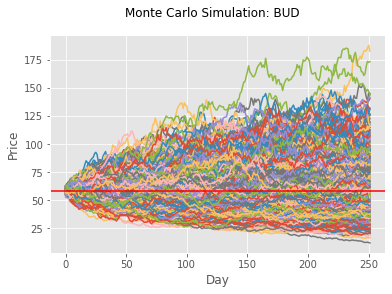

In [11]:
fig = plt.figure()
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
fig.suptitle('Monte Carlo Simulation: BUD')
plt.show()


In [12]:
avg=simulation_df.mean()
print('The highest average trading price over a year was', '$',avg.max())
print('The lowest average trading price over a year was', '$',avg.min())

The highest average trading price over a year was $ 127.3097612533733
The lowest average trading price over a year was $ 29.507180817079696
